In [ ]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
crypto_currency = 'BTC'
against_currency = 'USD'

In [ ]:
start = dt.datetime(2016,1,1)
# end = dt.datetime(2021,4,15)
end = dt.datetime.now()

In [ ]:
data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)

In [ ]:
print(data.tail())

                    High           Low          Open         Close  \
Date                                                                 
2022-08-11  24822.628906  23900.996094  23948.345703  23957.529297   
2022-08-12  24412.566406  23657.265625  23957.203125  24402.818359   
2022-08-13  24860.050781  24346.115234  24402.187500  24424.068359   
2022-08-14  24974.914062  24206.259766  24429.056641  24319.333984   
2022-08-15  25135.589844  23960.033203  24296.685547  24093.365234   

                 Volume     Adj Close  
Date                                   
2022-08-11  37127036580  23957.529297  
2022-08-12  27265804688  24402.818359  
2022-08-13  22987346289  24424.068359  
2022-08-14  22994133555  24319.333984  
2022-08-15  31458605056  24093.365234  


In [ ]:
# prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [ ]:
prediction_days = 60
future_days = 30
x_train = []
y_train = []

In [ ]:
for x in range(prediction_days,len(scaled_data)-future_days):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x+future_days, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [ ]:
#create neural network

# model = Sequential()

def prediction_model(predictors):
    # create model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(predictors,1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
predictors = x_train.shape[1]
model = prediction_model(predictors)

In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train, y_train, epochs=25, batch_size= 32)

Epoch 1/25
73/73 [==============================] - 5s 12ms/step - loss: 0.0151
Epoch 2/25
73/73 [==============================] - 1s 13ms/step - loss: 0.0087
Epoch 3/25
73/73 [==============================] - 1s 18ms/step - loss: 0.0082
Epoch 4/25
73/73 [==============================] - 1s 18ms/step - loss: 0.0080
Epoch 5/25
73/73 [==============================] - 1s 18ms/step - loss: 0.0073
Epoch 6/25
73/73 [==============================] - 1s 20ms/step - loss: 0.0076
Epoch 7/25
73/73 [==============================] - 1s 18ms/step - loss: 0.0072
Epoch 8/25
73/73 [==============================] - 1s 19ms/step - loss: 0.0067
Epoch 9/25
73/73 [==============================] - 1s 18ms/step - loss: 0.0069
Epoch 10/25
73/73 [==============================] - 1s 18ms/step - loss: 0.0065
Epoch 11/25
73/73 [==============================] - 1s 17ms/step - loss: 0.0065
Epoch 12/25
73/73 [==============================] - 1s 18ms/step - loss: 0.0060
Epoch 13/25
73/73 [==================

In [ ]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime(2021,4,15)
# test_end = dt.datetime.now()

In [ ]:
test_data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',test_start,test_end)
actual_prices = test_data['Close'].values

In [ ]:
print(test_data.tail())

                    High           Low          Open         Close  \
Date                                                                 
2021-04-12  61253.035156  59589.875000  60175.945312  59893.453125   
2021-04-13  63742.285156  59869.957031  59890.019531  63503.457031   
2021-04-14  64863.097656  61554.796875  63523.753906  63109.695312   
2021-04-15  63821.671875  62208.964844  63075.195312  63314.011719   
2021-04-16  63594.722656  60222.531250  63258.503906  61572.789062   

                 Volume     Adj Close  
Date                                   
2021-04-12  51828688519  59893.453125  
2021-04-13  69983454362  63503.457031  
2021-04-14  77451779687  63109.695312  
2021-04-15  60954381579  63314.011719  
2021-04-16  84293007468  61572.789062  


In [ ]:
print(actual_prices[-5:])

[59893.453125   63503.45703125 63109.6953125  63314.01171875
 61572.7890625 ]


In [ ]:
total_data = pd.concat((data['Close'], test_data['Close']),axis=0)

In [ ]:
model_inputs = total_data[len(total_data)-len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

In [ ]:
x_test = []
for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)


In [ ]:
# figure = plt.figure(figsize=(15,10))
# plt.plot(actual_prices, color= 'black', label='Actual Prices')
# plt.plot(prediction_prices, color='green', label='Prediction Prices')
# plt.title('Crypto Price Prediction')
# plt.xlabel('time');plt.ylabel('Price');


In [ ]:
prediction_prices = prediction_prices.tolist()
prediction_prices = sum(prediction_prices,[])

In [ ]:
print(actual_prices[-1],prediction_prices[-1])

61572.7890625 50635.51953125


**Predicting future values**

In [ ]:
real_data = [model_inputs[len(model_inputs) - prediction_days :len(model_inputs) + future_days,0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))


In [ ]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)


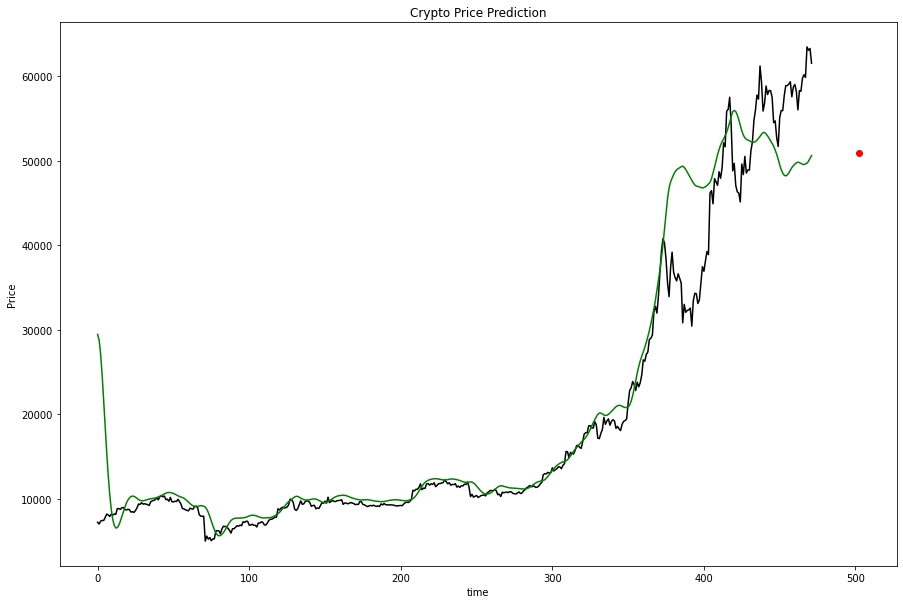

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.plot(actual_prices, color= 'black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Prediction Prices')
plt.plot(actual_prices.shape[0]+future_days,prediction[0][0],'ro')
plt.title('Crypto Price Prediction')
plt.xlabel('time');plt.ylabel('Price');